# Loading Data and Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
Sepssis_dataframe = pd.read_csv('Paitients_Files_Train.csv', delimiter =',')
Sepssis_dataframe.head()

    

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


Loading the dataframe and displaying first 5 rows of it.

In [2]:
Sepssis_dataframe.isnull().values.any()

False

It's good practice to make sure to check if there is null values in the data
The dataset doesn't have any null values.

In [3]:
Sepssis_dataframe.shape

(599, 11)

The dataset has 599 rows and 11 columns.

In [4]:
Sepssis_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


There are total 11 columns in the dataset. The abbreviated column names are as follows:
- ID: Patient ID
- PRG: Plasma Glucose
- PL: Blood Work Result-1
- PR: Blood Pressure
- SK: Blood Work Result-2
- TS: Blood Work Result-3
- M11: Body Mass Index
- BD2: Blood Work Result-4
- Age: Patient Age
- Insurance: If Patient has Insurance card or not
- Sepssis: If Patient in ICU has Sepssis or not


<font color ='red'> The target column is **Sepssis**</font>

In [5]:
Sepssis_dataframe.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


All of the data lies into the category of Continuous Variables..

The Minimum Age of the Patient is 21 years while the Maximum Age of Patient is 81 years..

In [6]:
Sepssis_dataframe_with_features=Sepssis_dataframe.drop(['ID', 'Insurance'], axis=1)
Sepssis_dataframe_with_features

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,Negative
595,0,188,82,14,185,32.0,0.682,22,Positive
596,0,67,76,0,0,45.3,0.194,46,Negative
597,1,89,24,19,25,27.8,0.559,21,Negative


Dropping ID and Insurance column from the data as they are not important features...

# Data Visualization

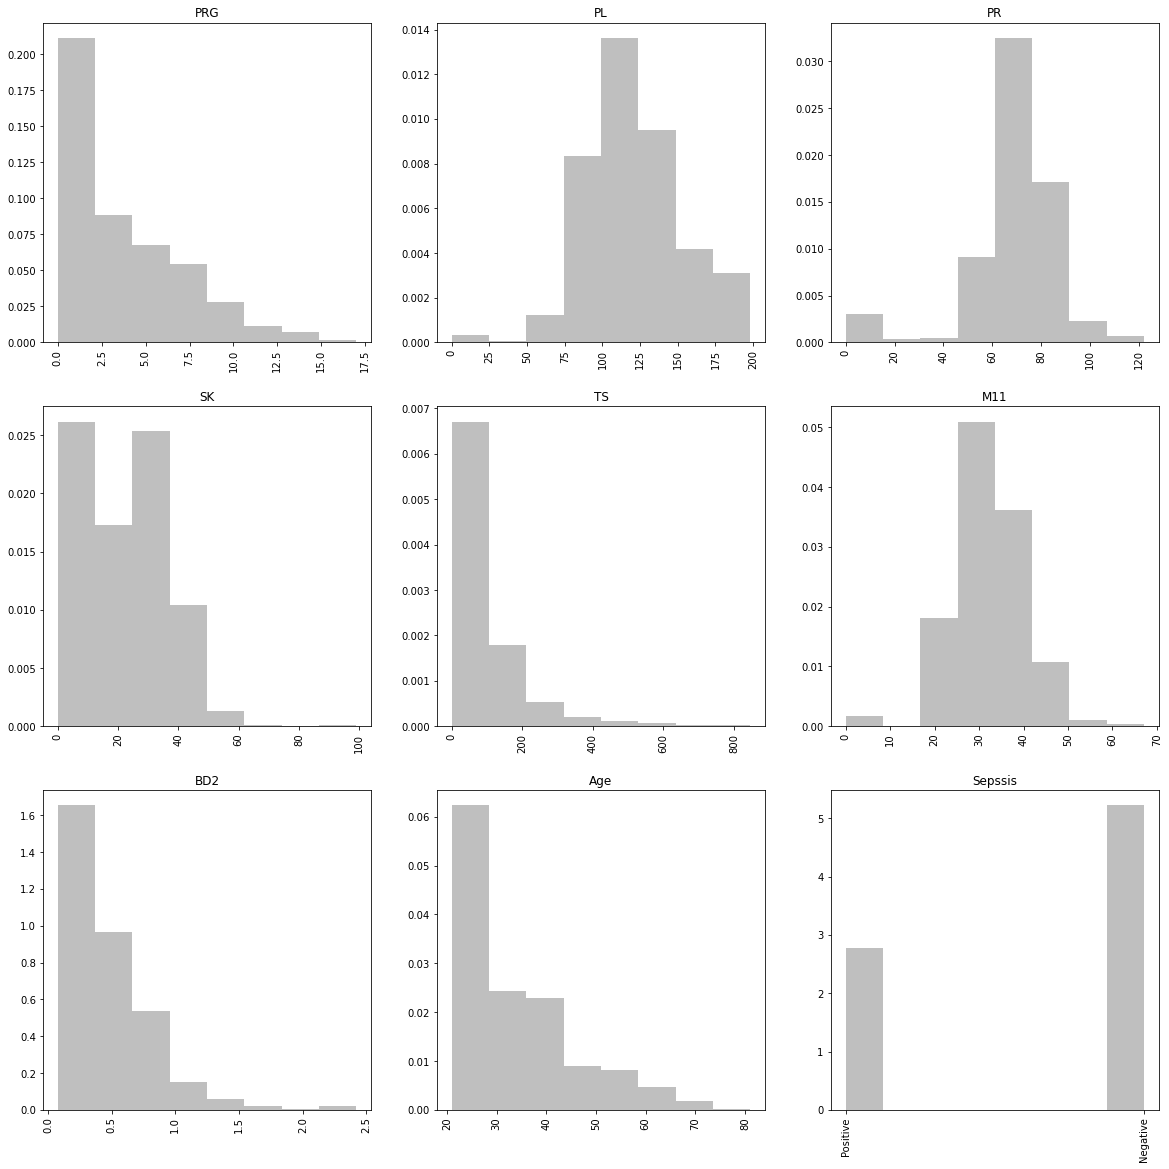

In [7]:
plt.figure(figsize=(20,20))
for i, col_i in enumerate(Sepssis_dataframe_with_features.columns):
    plt.subplot(3,3,i+1)
    plt.hist(Sepssis_dataframe_with_features[col_i], alpha=0.5, color='gray', density=True, bins=8)
    plt.title(col_i)
    plt.xticks(rotation='vertical')

- The target column sepssis is categorical variable.
- Many attributes are heavily skewed. eg. PRG, SK, TS, BD2, Age.


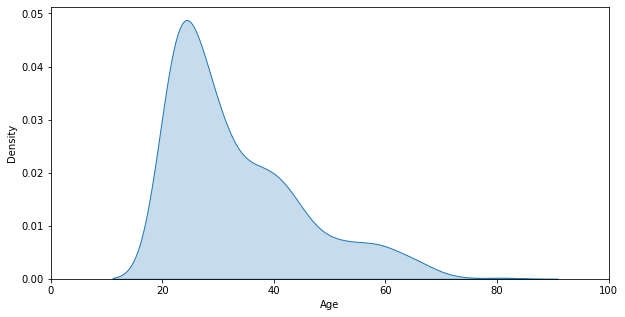

In [8]:
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.xlabel('Age')
plt.ylabel('Density')
sns.kdeplot(Sepssis_dataframe_with_features['Age'],shade=True)
plt.show()

Most patients are of Young age. They lie between 20 to 35..

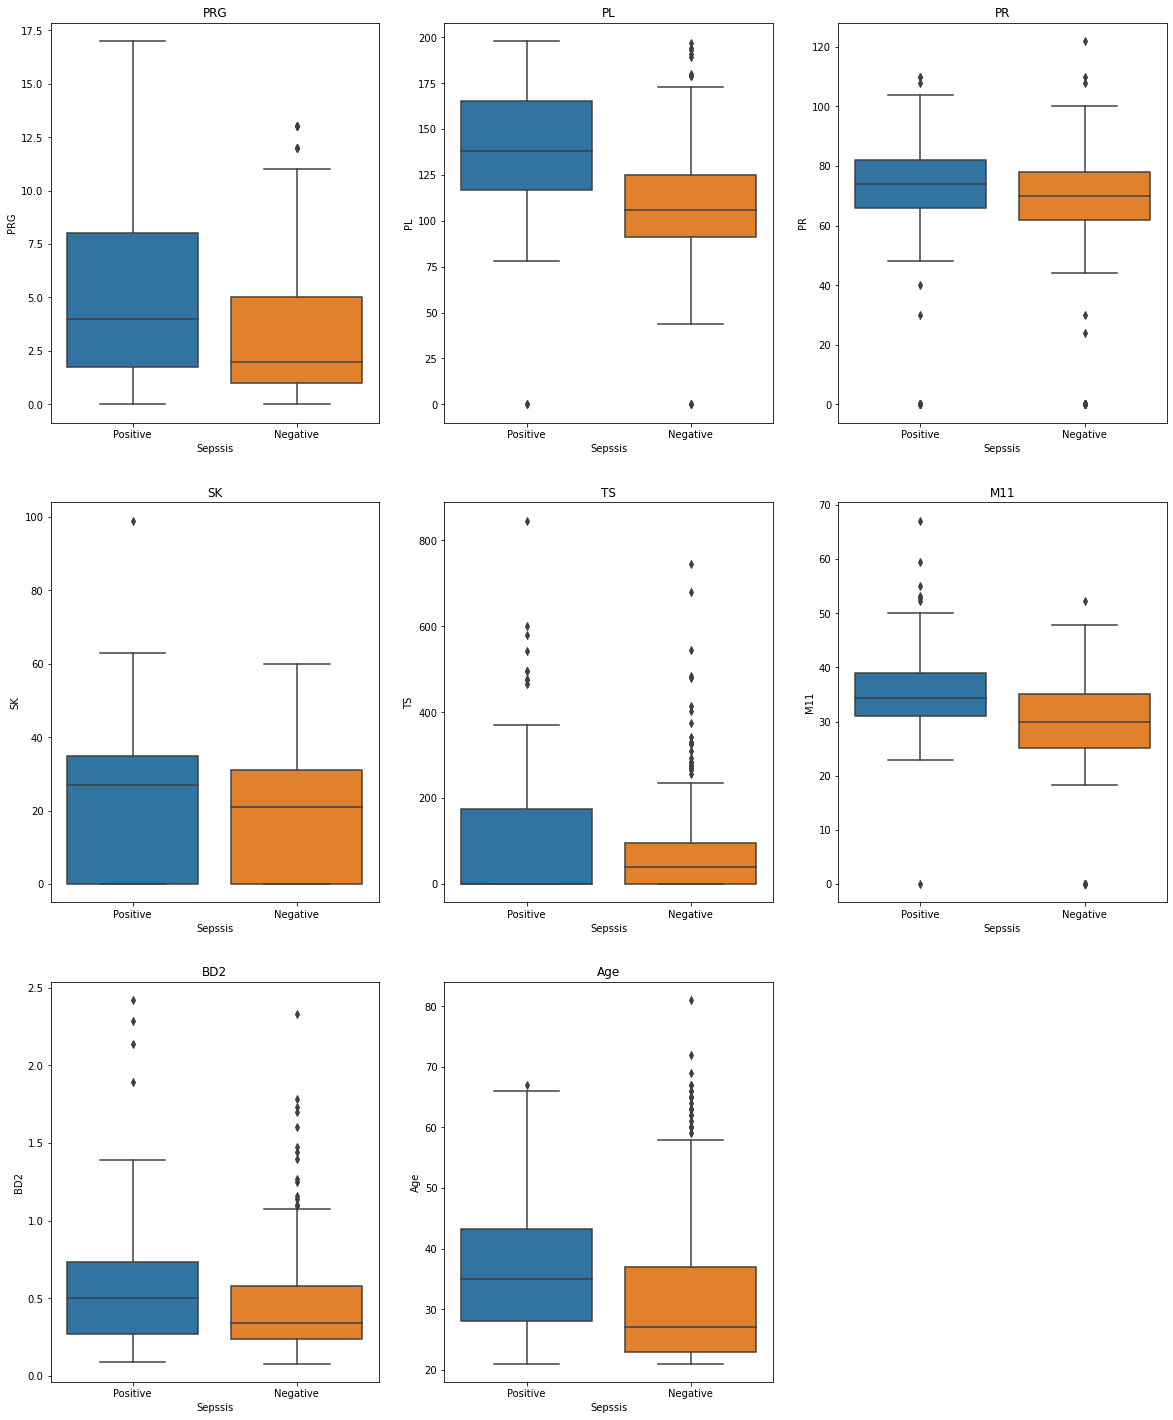

In [9]:

plt.figure(figsize=(20,25))
i=1
for column in Sepssis_dataframe_with_features.columns:
  
  if column != 'Sepssis':
    plt.subplot(3,3,i)
    sns.boxplot(x='Sepssis',y=column,data=Sepssis_dataframe_with_features)
    i = i+1
    plt.title(column)

plt.show()

- Plasma Glucose of Patients having Sepssis is higher than the Patients who don't have Sepssis.
- Blood Work Result-1 of Patients not having Sepssis is lower as compared to the Sepssis Patients.
- Both Blood Pressure and Blood Result-2 are almost Equivalent for Both Positive and Negative Patients.
- Young Patients Largely don't Delevop Sepssis.

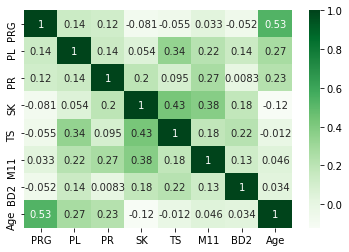

In [10]:
dataplot = sns.heatmap(Sepssis_dataframe_with_features.corr(), cmap="Greens", annot=True)
  
# displaying heatmap
plt.show()

- Attributes having high correlation between them are 1) PRG and Age 2) SK and TS.
- Other Attibutes have very small positive and negative correlation between them.

In [11]:
Sepssis_dataframe_with_features["Sepssis"].replace({"Positive": 1, "Negative": 0}, inplace=True)
Sepssis_dataframe_with_features

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,0
597,1,89,24,19,25,27.8,0.559,21,0


Replacing the target values into binary values 1 and 0 for building the classification model

# Splitting the data 

In [12]:
from sklearn.model_selection import train_test_split


training_data, testing_data = train_test_split(Sepssis_dataframe_with_features, test_size=0.20, shuffle=True,random_state=0)
    
training_data, validation_data = train_test_split(training_data, test_size=0.20, shuffle=True,random_state=0)
    
print(training_data.shape[0], validation_data.shape[0], testing_data.shape[0])

383 96 120


In [13]:
training_X =training_data.drop(['Sepssis',], axis =1).to_numpy()
training_y = training_data[['Sepssis']].to_numpy()


testing_X = testing_data.drop(['Sepssis',], axis=1).to_numpy()
testing_y = testing_data[['Sepssis']].to_numpy()


validation_X = validation_data.drop(['Sepssis',], axis=1).to_numpy()
validation_y = validation_data[['Sepssis']].to_numpy()

Converting the training, testing and validation data to np arrays respectively 

In [14]:
from sklearn.metrics import f1_score
# function for getting accuracy
def get_accuracy_score(clf, training_X, training_y, validation_X, validation_y):
    training_prediction = clf.predict(training_X)
    val_prediction = clf.predict(validation_X)
    
    training_f1 = f1_score(training_y, training_prediction, average='macro')
    validation_f1 = f1_score(validation_y, val_prediction, average='macro')
    
    return training_f1, validation_f1

# Baseline model

Selecting logistic regression for the mentioned task as the Baseline model.

# Scaling features

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(training_X)

training_X = scaler.transform(training_X)
validation_X = scaler.transform(validation_X)
testing_X = scaler.transform(testing_X)

In [16]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced').fit(training_X, training_y.ravel())

train_f1, val_f1 = get_accuracy_score(clf, training_X, training_y, validation_X, validation_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.740
Validation F1-Score score: 0.661


# Regularisation

In [17]:
params_grid=[
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : np.logspace(-4,4,20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [100,500,700]
    }
]

The accuracy of  un-regularised model shows good training performance but still the gap between training and validation indicates that regularisation must be applied.

In [18]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(Model, param_grid = params_grid, cv =5, verbose = True, n_jobs =-1 )
best_clf = clf.fit(training_X,training_y.ravel())

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


Using GridSearch for applying regularisation and using 5 folds at time

In [19]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none')

In [20]:
print(f'Accuracy : {best_clf.score(training_X,training_y):.3f}')

Accuracy : 0.786


When tuning different parameters it was found that model had best accuracy when  gridsearch was applied to the baseline model with C=0.0001 and penalty = none
                        

# K-Fold Cross Validation


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# Using f folds at time
kf = KFold(n_splits=5)
score_hold_val = list()
score_hold_train = list()

# looping through index of each set
for train_index, val_index in kf.split(training_X):
    training_x_split = training_X[train_index,:]
    training_y_split = training_y[train_index,:]
    validation_x_split = training_X[val_index,:]
    validation_y_split = training_y[val_index,:]
    clf = GridSearchCV(Model, param_grid = params_grid, cv =5, verbose = True, n_jobs =-1 )
    best_clf = clf.fit(training_X,training_y.ravel())
    
    train_pred = clf.predict(training_x_split)
    val_pred = clf.predict(validation_x_split)
    
    train_acc = accuracy_score(training_y_split, train_pred)
    val_acc = accuracy_score(validation_y_split, val_pred)
    
    score_hold_train.append(train_acc)
    score_hold_val.append(val_acc)
    
print('Cross validation Error: ' + str(np.mean(score_hold_val)))

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Cross validation Error: 0.7858851674641149


# Decision Tree



Maximum accuracy:- 0.7416666666666667 ,min_samples_split = 3 , criterion is entropy


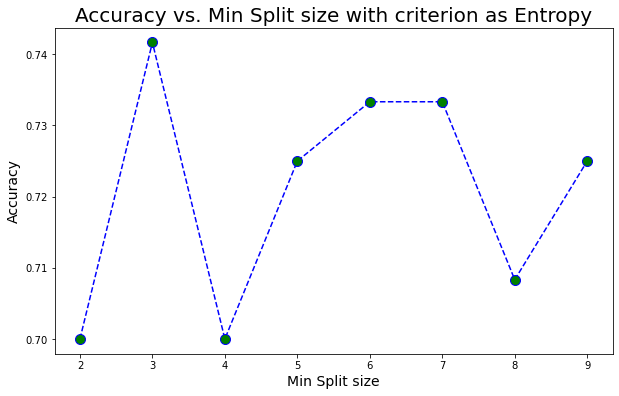

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report


acc = []

for i in range(2,10):
    clf=DecisionTreeClassifier(criterion="entropy",min_samples_split=i)
    clf=clf.fit(training_X,training_y)
    y_pred=clf.predict(testing_X)
    acc.append(metrics.accuracy_score(testing_y, y_pred))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,10),acc,color='blue', 
         marker='o',markerfacecolor='green',linestyle='dashed', markersize=10)
plt.title('Accuracy vs. Min Split size with criterion as Entropy' ,fontsize=20)
plt.xlabel('Min Split size',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
print("Maximum accuracy:-",max(acc),",min_samples_split =",acc.index(max(acc)) +2,", criterion is entropy" )

maxium_accuracy_entropy = max(acc)
split_size_entropy = acc.index(max(acc)) +2

In [23]:
from sklearn.metrics import balanced_accuracy_score
# function for getting accuracy
def get_accuracy_score(clf, training_X, training_y, validation_X, validation_y):
    train_pred = clf.predict(training_X)
    val_pred = clf.predict(validation_X)
    
    train_acc = balanced_accuracy_score(training_y, train_pred)
    val_acc = balanced_accuracy_score(validation_y, val_pred)
    
    return train_acc, val_acc

# Random Forest

In [24]:
N, m = training_X.shape
num_of_trees = 10
clfs = list()
column_index = list()
validation_acc_hold = list()
for i in range(0,num_of_trees):
    data_index = np.random.choice(N, N, replace=True)
    col_index = np.random.choice(m, np.floor(m/2).astype(np.int), replace=False)

    X_train1 = training_X[data_index, :][:, col_index]

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
    clf = clf.fit(X_train1, training_y[data_index].ravel())
    
    clfs.append(clf)
    column_index.append(column_index)

    X_val1 = validation_X[:, col_index]

    train_acc, val_acc = get_accuracy_score(clf, X_train1, training_y[data_index].ravel(), X_val1, validation_y)
    print("Validation Accuracy score: {:.3f}".format(val_acc))
    validation_acc_hold.append(val_acc)

Validation Accuracy score: 0.558
Validation Accuracy score: 0.594
Validation Accuracy score: 0.616
Validation Accuracy score: 0.559
Validation Accuracy score: 0.566
Validation Accuracy score: 0.665
Validation Accuracy score: 0.536
Validation Accuracy score: 0.629
Validation Accuracy score: 0.588
Validation Accuracy score: 0.546


In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(training_X, training_y)

RandomForestClassifier(max_depth=5, random_state=0)

In [26]:
train_acc, val_acc = get_accuracy_score(clf, training_X, training_y, validation_X, validation_y)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

Train Accuracy score: 0.847
Validation Accuracy score: 0.707


# Ultimate Judgement

From all of the above scenario it can be seen that the best model is the random forest. The model Accuracy is great and the model is not overfitted but it is efficient .Also the gap between train and validation is not too much. Hence Selecting it as the best Model for this Task..

# Testing On Test Data Set 

In [27]:
Sepssis_test_df=pd.read_csv('Paitients_Files_Test.csv')
Sepssis_test_df.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0


Loading The test dataset into dataframe.

In [28]:
Sepssis_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


None of the columns in the dataset have null values..

In [29]:
Sepssis_test_df_with_features = Sepssis_test_df.drop(['ID', 'Insurance'],axis =1)
test_x = np.array( Sepssis_test_df.drop(['ID', 'Insurance'],axis =1))
print(test_x.shape)


(169, 8)


Dropping the Un-important features from the dataframe and converting them into np array.

# Final Testing on the Best Model Build(Random Forest)

In [30]:
Sepssis_test_df_with_features

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63
165,2,122,70,27,0,36.8,0.340,27
166,5,121,72,23,112,26.2,0.245,30
167,1,126,60,0,0,30.1,0.349,47


In [31]:
from sklearn.metrics import classification_report
clf =  RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(training_X, training_y)
test_prediction = clf.predict(test_x)
test_prediction = test_prediction.tolist()
print(test_prediction)
final_judgement = []
for index in test_prediction:
    if index ==1:
        final_judgement.append("Positive")
    else:
        final_judgement.append("Negative")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
result_df = pd.read_csv("S1234567 predictions.csv")
result_df["Sepssis"] = final_judgement
result_df.to_csv("S3856019_predictions.csv", index=False)